#Guía 7: Índices

Se cuenta con varias tablas que son instancias del siguiente esquema abstracto:

* $\color{green}{\textbf{pelicula}}(\color{blue}{\underline{\text{nombre}}}, \color{blue}{\underline{\text{anho}}}, \color{blue}{\text{calificacion}}, \color{blue}{\text{votos}})$ 
* $\color{green}{\textbf{actor}}(\color{blue}{\underline{\text{nombre}}}, \color{blue}{\text{genero}})$
* $\color{green}{\textbf{personaje}}(\color{blue}{\underline{\text{p_nombre}}}, \color{blue}{\underline{\text{p_anho}}},  \color{blue}{\underline{\text{a_nombre}}}, \color{blue}{\text{personaje}})$

La tabla $\color{green}{\textbf{personaje}}$ usa llaves foráneas que hacen referencia a las tablas de $\color{green}{\textbf{actor}}(\color{blue}{\underline{\text{a_nombre}}})$ y $\color{green}{\textbf{pelicula}}(\color{blue}{\underline{\text{p_nombre}}}, \color{blue}{\underline{\text{p_anho}}})$.

Para iniciar el servidor virtual, instalar la base de datos postgres, y descargar los datos e importarlos, debe correr el siguiente bloque:



In [ ]:
# install
!apt update
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://@/postgres
!pip install gdown
!gdown https://drive.google.com/uc?id=1tyY6baamCXrweBqu2MGJC_fOJMaV_6j7
!gdown https://drive.google.com/uc?id=1ffipzThl9AWghHu0bfTKY-YMIsXdZGw_
!sudo -u postgres psql -c "CREATE SCHEMA g"
!sudo -u postgres psql -c "CREATE SCHEMA gi"
!psql postgres < /content/guia5.sql
!psql postgres < /content/guia5i.sql

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Downloading...
From: https://drive.google.com/uc?id=1tyY6baamCXrweBqu2MGJC_fOJMaV_6j7
To: /content/guia5.sql
100% 211M/211M [00:01<00:00, 209MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ffipzThl9AWghHu0bfTKY-YMIsXdZGw_
To: /content/guia5i.sql
100% 211M/211M [00:01<00:00, 198MB/s]
CREATE SCHEMA
CREATE SCHEMA
SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

SET
SET
SET
SET
ERROR:  schema "g" already exists
ALTER SCHEMA
SET
SET
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
COPY 856421
COPY 440234
COPY 197219
COPY 72696
COPY 22490
COPY 6401
COPY 2170526
COPY 944964
COPY 372367
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
ALTER TABLE
GRANT
GRANT
GRANT
GRANT
GRANT
GRANT
GRA

Ejecute la siguiente consulta para probar que todo ande bien:

In [ ]:
%sql SELECT * FROM g.pelicula100;

 * postgresql+psycopg2://@/postgres


,nombre,anho,calificacion,votos
0,The Bad Lieutenant: Port of Call - New Orleans,2009,6.7,64076
1,A Woman of Distinction,1950,6.7,239
2,Around the World,1943,5.8,130
3,Chain Lightning,1950,6.0,673
4,Los tarantos,1963,7.4,185
...,...,...,...,...
72691,Zizek!,2005,7.4,1173
72692,Chrigu,2007,7.5,117
72693,Unmistaken Child,2008,7.7,613
72694,"Kyvadlo, jáma a nadeje",1984,7.8,610


Para ejecutar consultas multi-lineas use el tag %%sql:

In [ ]:
%%sql
SELECT * FROM g.actor1000;

 * postgresql+psycopg2://@/postgres


,nombre,genero
0,Name,F
1,7 Year Bitch,F
2,"Aabel, Hauk (II)",F
3,"Aabel, Per (II)",F
4,"Aadland, Beverly",F
...,...,...
440229,"Þorsteinsson, Jón Pétur",M
440230,"Þórarinsson, Kjartan",M
440231,"Þórisdóttir, Hulda",M
440232,"Þórunnarson, Davíð Freyr",M


Ahora, debe diseñar las consultas que resuelvan las siguientes preguntas usando los operadores vistos en clases.

# Índices

En la base de datos hay dos esquemas: uno con datos indexados ($\texttt{gi}$) y otro sin índices ($\texttt{g}$). En cada esquema está la misma estructura tres veces con los datos para películas con más de 10.000 votos, más de 1.000 votos y más de 100 votos. Note que las tablas de más de 10.000 votos tienen **menos** tuplas que las 1.000 y muchas **menos** que las 100. En esta guía, usted medirá el efecto de utilizar índices en los tiempos de consultas.


## Pregunta 1

Nota para las siguientes preguntas: Observe que estos conteos no cambian en el caso de $gi$, así que no hay que contar las tuplas y los bloques dos veces.

1. Usando el esquema $\texttt{g}$ cuente el número de tuplas para cada tablas presente. Registre las consultas y sus resultados.
Puede usar el comando 
$\texttt{\dt g.*}$ para listar todas las tablas del schema $\texttt{g}$ (escriba "q" en el texto que sale a continuación de (END) para terminar la ejecución de la celda.



In [ ]:
!sudo -u postgres psql -c "\dt g.*"

             List of relations
 Schema |      Name      | Type  |  Owner   
--------+----------------+-------+----------
 g      | actor100       | table | postgres
 g      | actor1000      | table | postgres
 g      | actor10000     | table | postgres
 g      | pelicula100    | table | postgres
 g      | pelicula1000   | table | postgres
 g      | pelicula10000  | table | postgres
 g      | personaje100   | table | postgres
 g      | personaje1000  | table | postgres
 g      | personaje10000 | table | postgres
(9 rows)

>8

In [ ]:
%%sql

SELECT COUNT(*) FROM g.actor100; -- 856421 
SELECT COUNT(*) FROM g.pelicula100; -- 72696 
SELECT COUNT(*) FROM g.personaje100; -- 2170526 
SELECT COUNT(*) FROM g.actor1000; -- 440234
SELECT COUNT(*) FROM g.pelicula1000; -- 22490 
SELECT COUNT(*) FROM g.personaje1000; -- 944964 
SELECT COUNT(*) FROM g.actor10000; -- 197219 
SELECT COUNT(*) FROM g.pelicula10000; -- 6401 
SELECT COUNT(*) FROM g.personaje10000; -- 372367 





 * postgresql+psycopg2://@/postgres


,count
0,372367


2. Cuente cuántos bloques hay en cada tabla.
Para ello puede usar la siguiente consulta:
``` 
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = '[tabla-nombre]';
```
Donde $\texttt{relpages}$ corresponde al número de bloques en Postgresql.



In [ ]:
%%sql
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'actor100'; -- 5278
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'pelicula100'; -- 598
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'personaje100'; -- 21410
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'actor1000'; -- 2712
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'pelicula1000'; -- 183
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'personaje1000'; -- 9330
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'actor10000'; -- 1215
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'pelicula10000'; -- 52
SELECT DISTINCT relname, relpages FROM pg_class WHERE relname = 'personaje10000'; -- 3684

 * postgresql+psycopg2://@/postgres


,relname,relpages
0,personaje10000,3684


3. Calcule el número promedio de tuplas por bloque para cada tabla.



In [ ]:
actor100; ~162 tuplas por bloque  
pelicula100; ~122 tuplas por bloque 
personaje100; ~101 tuplas por bloque
actor1000; ~162 tuplas por bloque
pelicula1000; ~122 tuplas por bloque
personaje1000; ~101 tuplas por bloque
actor10000; ~162 tuplas por bloque 
pelicula10000; ~123 tuplas por bloque
personaje10000; ~101 tuplas por bloque

## Pregunta 2
Compare los índices disponibles para las tres tablas con el prefijo $\texttt{10000}$ en ambos esquemas usando los dos comandos 
$\texttt{\d+ g.[tabla]10000}$ y $\texttt{\d+ gi.[tabla]10000}$. Recuerde que Postgres agrega un
índice para la llave primaria por defecto, entonces $\texttt{g}$ solo tiene esos índices. (Se configuran los índices de las tablas $\texttt{1000}$ y $\texttt{100}$ de la misma forma.)



In [ ]:
  !sudo -u postgres psql -c "\d+ g.actor10000"

                                           Table "g.actor10000"
 Column |          Type          | Collation | Nullable | Default | Storage  | S tats target | Description 
--------+------------------------+-----------+----------+---------+----------+-- ------------+-------------
 nombre | character varying(255) |           | not null |         | extended |               | 
 genero | character(1)           |           | not null |         | extended |               | 
Indexes:
    "actor10000_pkey" PRIMARY KEY, btree (nombre)
Check constraints:
    "actor10000_genero_check" CHECK (genero = ANY (ARRAY['F'::bpchar, 'M'::bpcha r]))
Referenced by:
    TABLE "g.personaje10000" CONSTRAINT "personaje10000_a_nombre_fkey" FOREIGN K EY (a_nombre) REFERENCES g.actor10000(nombre)

>8

In [ ]:
!sudo -u postgres psql -c "\d+ gi.actor10000"

                                          Table "gi.actor10000"
 Column |          Type          | Collation | Nullable | Default | Storage  | S tats target | Description 
--------+------------------------+-----------+----------+---------+----------+-- ------------+-------------
 nombre | character varying(255) |           | not null |         | extended |               | 
 genero | character(1)           |           | not null |         | extended |               | 
Indexes:
    "actor10000_pkey" PRIMARY KEY, btree (nombre)
    "actor10000_genero" btree (genero)
    "actor10000_nombre" btree (nombre)
Check constraints:
    "actor10000_genero_check" CHECK (genero = ANY (ARRAY['F'::bpchar, 'M'::bpcha r]))
Referenced by:
    TABLE "gi.personaje10000" CONSTRAINT "personaje10000_a_nombre_fkey" FOREIGN  KEY (a_nombre) REFERENCES gi.actor10000(nombre)

>8

# Pregunta 3
Use el siguiente comando para obtener los planes de consulta y tiempos de ejecución de la consulta indicada. Ejecútela en los esquemas $\texttt{g}$ y $\texttt{gi}$.

```
EXPLAIN ANALYZE SELECT * FROM [squema].personaje100 WHERE p_nombre='Up' AND p_anho=2009;
```



1.   Registre el plan de consulta y el tiempo de ejecución. 
2.   Calcule y registre la cantidad de consultas por segundo (según la suma del tiempo de planificación y ejecución) que pueden realizarse.



In [ ]:
!sudo -u postgres psql -c "EXPLAIN ANALYZE SELECT * FROM g.personaje100 WHERE p_nombre='Up' AND p_anho=2009";

                                                          QUERY PLAN                                                           
-------------------------------------------------------------------------------- ----------------------------------------------
 Gather  (cost=1000.00..35974.99 rows=2 width=47) (actual time=25.318..243.405 r ows=33 loops=1)
   Workers Planned: 2
   Workers Launched: 2
   ->  Parallel Seq Scan on personaje100  (cost=0.00..34974.79 rows=1 width=47)  (actual time=20.953..234.987 rows=11 loops=3)
         Filter: (((p_nombre)::text = 'Up'::text) AND (p_anho = 2009))
         Rows Removed by Filter: 723498
 Planning time: 0.703 ms
 Execution time: 243.449 ms
(8 rows)

>8

In [ ]:
1000/(243.449+0.703)

4.095960154499617

~4 consultas por segundo

In [ ]:
!sudo -u postgres psql -c "EXPLAIN ANALYZE SELECT * FROM gi.personaje100 WHERE p_nombre='Up' AND p_anho=2009";

                                                                QUERY PLAN                                                                 
-------------------------------------------------------------------------------- ----------------------------------------------------------
 Index Scan using personaje100_pnombreanho on personaje100  (cost=0.43..12.47 ro ws=2 width=47) (actual time=0.104..0.880 rows=33 loops=1)
   Index Cond: (((p_nombre)::text = 'Up'::text) AND (p_anho = 2009))
 Planning time: 0.961 ms
 Execution time: 0.908 ms
(4 rows)

>8

In [ ]:
1000/(0.961+0.908)

535.0454788657036

535 consultas por segundo

## Pregunta 4
De la pregunta anterior, calcule y registre una estimación de la cantidad de bloques leídos ($\pm1$) por las dos consultas. Para esto considere el plan, el número de tuplas en el resultado, el número de tuplas en la tabla, y el número promedio de tuplas por bloque, en cada uno de los dos esquemas.

$\texttt{g}$: lee todas las tuplas de la tabla: 2170527 tuplas, 21410 bloques

$\texttt{gi}$: lee solo las tuplas de Up (2009): 33 tuplas, 1--2 bloques

## Pregunta 5
Considerando solo las tablas 100:



1.   Consulte por las **otras** películas (nombre y año) en las cuales los actores/actrices de 'Up (2009)' han participado. \\
Para ello, escriba dos versiones equivalentes de la misma consulta: una versión sin anidación y otra versión con anidación (usando $\texttt{IN}$). 





In [ ]:
%%sql
SELECT DISTINCT P2.p_nombre, P2.p_anho
  FROM g.personaje100 P1, g.personaje100 P2 
  WHERE P1.p_nombre='Up' 
    AND P1.p_anho=2009
    AND P1.a_nombre = P2.a_nombre 
    AND ( P2.p_nombre <> 'Up' OR P2.p_anho <> 2009 );

 * postgresql+psycopg2://@/postgres


,p_nombre,p_anho
0,9 (I),2009
1,Aa! Megamisama! The Movie,2000
2,A Beautiful Mind,2001
3,Above Suspicion,2000
4,A Bridge Too Far,1977
...,...,...
455,Wondrous Oblivion,2003
456,Wreck-It Ralph,2012
457,X2,2003
458,Yanks,1979


In [ ]:
%%sql
SELECT DISTINCT p_nombre, p_anho 
    FROM g.personaje100 
    WHERE a_nombre IN ( 
        SELECT a_nombre 
        FROM g.personaje100 
        WHERE p_nombre = 'Up' AND p_anho=2009) 
      AND ( p_nombre <> 'Up' OR p_anho <> 2009 );

 * postgresql+psycopg2://@/postgres


,p_nombre,p_anho
0,9 (I),2009
1,Aa! Megamisama! The Movie,2000
2,A Beautiful Mind,2001
3,Above Suspicion,2000
4,A Bridge Too Far,1977
...,...,...
455,Wondrous Oblivion,2003
456,Wreck-It Ralph,2012
457,X2,2003
458,Yanks,1979


2.  Utilize $\texttt{EXPLAIN ANALYZE}$ en ambas consultas y obtenga los planes y tiempos de ejecución para los esquemas $\texttt{g}$ y $\texttt{gi}$.

In [ ]:
!sudo -u postgres psql -c "EXPLAIN ANALYZE SELECT DISTINCT P2.p_nombre, P2.p_anho \
  FROM g.personaje100 P1, g.personaje100 P2 \
  WHERE P1.p_nombre='Up' \
    AND P1.p_anho=2009\
    AND P1.a_nombre = P2.a_nombre \
    AND ( P2.p_nombre <> 'Up' OR P2.p_anho <> 2009 )";

                                                                             QUE RY PLAN                                                                               
-------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -----
 Unique  (cost=36009.83..36010.13 rows=40 width=19) (actual time=254.087..254.35 1 rows=460 loops=1)
   ->  Sort  (cost=36009.83..36009.93 rows=40 width=19) (actual time=254.086..25 4.232 rows=803 loops=1)
         Sort Key: p2.p_nombre, p2.p_anho
         Sort Method: quicksort  Memory: 76kB
         ->  Gather  (cost=1000.55..36008.76 rows=40 width=19) (actual time=22.3 49..253.112 rows=803 loops=1)
               Workers Planned: 2
               Workers Launched: 2
               ->  Nested Loop  (cost=0.56..35004.76 rows=17 width=19) (actual t ime=10.429..242.835 rows=268 loops=3)
                     ->  Parallel Seq Scan on personaje100 p1  

In [ ]:
!sudo -u postgres psql -c "explain ANALYZE SELECT DISTINCT p_nombre, p_anho \
    FROM g.personaje100 \
    WHERE a_nombre IN ( \
        SELECT a_nombre \
        FROM g.personaje100 \
        WHERE p_nombre = 'Up' AND p_anho=2009) \
      AND ( p_nombre <> 'Up' OR p_anho <> 2009 )";

                                                                                 QUERY PLAN                                                                                  
-------------------------------------------------------------------------------- -------------------------------------------------------------------------------- -----------
 Unique  (cost=36196.70..36217.86 rows=2822 width=19) (actual time=253.342..253. 570 rows=460 loops=1)
   ->  Sort  (cost=36196.70..36203.75 rows=2822 width=19) (actual time=253.341.. 253.464 rows=795 loops=1)
         Sort Key: personaje100.p_nombre, personaje100.p_anho
         Sort Method: quicksort  Memory: 75kB
         ->  Nested Loop  (cost=35975.55..36034.96 rows=2822 width=19) (actual t ime=251.774..252.630 rows=795 loops=1)
               ->  Unique  (cost=35975.00..35975.01 rows=2 width=16) (actual tim e=251.690..251.787 rows=32 loops=1)
                     ->  Sort  (cost=35975.00..35975.00 rows=2 width=16) (actual  time=2

## Pregunta 6
Tomando la consulta de la Pregunta 3, y ambas consultas de 5, substituya 'Up (2019)' por otra película (que aparezca en la tabla $\texttt{pelicula10000}$). Para las tres consultas resultantes, debe:

1. Ejecutar las consultas en el esquema $\texttt{g}$ usando las tablas terminadas en $\texttt{100}$, $\texttt{1000}$ y $\texttt{10000}$ usando $\texttt{EXPLAIN ANALYZE}$ y registrar los tiempos.
2. Ejecutar las consultas en el esquema $\texttt{gi}$ usando las tablas terminadas en $\texttt{100}$, $\texttt{1000}$ y $\texttt{10000}$ usando $\texttt{EXPLAIN ANALYZE}$ y registrar los tiempos. 
3. Mostrar gráficamente (con la herramienta que estime conveniente) cómo varía el tiempo tomado (la suma del tiempo de ejecución y el tiempo de planificación) respecto al tamaño de las tablas, tanto en la versión sin índices, como en la versión indexada. Considere que el tamaño de la tabla es el número de tuplas en la tabla $\texttt{personaje*}$.


Para gráficar puede usar la libreria matplotlib como se describe a continuación para graficar dos series:
```
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = [100, 1000, 10000]
y = np.array([[1,2], [3,4], [5,6]])
plt.plot(x, y)
```

In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM g.personaje100 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Gather (cost=1000.00..35974.99 rows=2 width=4...
1,Workers Planned: 2
2,Workers Launched: 2
3,-> Parallel Seq Scan on personaje100 (cost...
4,Filter: (((p_nombre)::text = 'Up'::tex...
5,Rows Removed by Filter: 723498
6,Planning time: 0.126 ms
7,Execution time: 256.636 ms


In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM g.personaje1000 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Gather (cost=1000.00..16236.23 rows=2 width=4...
1,Workers Planned: 2
2,Workers Launched: 2
3,-> Parallel Seq Scan on personaje1000 (cos...
4,Filter: (((p_nombre)::text = 'Up'::tex...
5,Rows Removed by Filter: 314977
6,Planning time: 0.148 ms
7,Execution time: 127.294 ms


In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM g.personaje10000 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Gather (cost=1000.00..7011.59 rows=3 width=47...
1,Workers Planned: 2
2,Workers Launched: 2
3,-> Parallel Seq Scan on personaje10000 (co...
4,Filter: (((p_nombre)::text = 'Up'::tex...
5,Rows Removed by Filter: 124111
6,Planning time: 0.151 ms
7,Execution time: 63.365 ms


In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM gi.personaje100 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Index Scan using personaje100_pnombreanho on p...
1,Index Cond: (((p_nombre)::text = 'Up'::text)...
2,Planning time: 0.172 ms
3,Execution time: 0.138 ms


In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM gi.personaje1000 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Index Scan using personaje1000_pnombreanho on ...
1,Index Cond: (((p_nombre)::text = 'Up'::text)...
2,Planning time: 0.189 ms
3,Execution time: 0.119 ms


In [ ]:
%sql EXPLAIN ANALYZE SELECT * FROM gi.personaje10000 WHERE p_nombre='Up' AND p_anho=2009

 * postgresql+psycopg2://@/postgres


,QUERY PLAN
0,Bitmap Heap Scan on personaje10000 (cost=4.45...
1,Recheck Cond: (((p_nombre)::text = 'Up'::tex...
2,Heap Blocks: exact=32
3,-> Bitmap Index Scan on personaje10000_pnom...
4,Index Cond: (((p_nombre)::text = 'Up':...
5,Planning time: 0.186 ms
6,Execution time: 0.195 ms


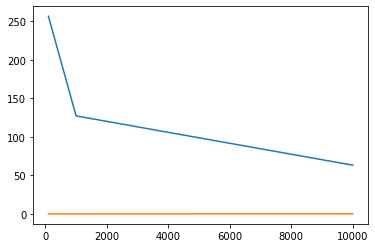

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = [100, 1000, 10000]
y = np.array([[256.636,0.138], [127.294,0.119], [63.365,0.195]])
plt.plot(x, y)




In [ ]:
%%sql 
SELECT * FROM g.personaje100
WHERE p_nombre='Whiplash' AND p_anho=2014;

 * postgresql+psycopg2://@/postgres


,a_nombre,p_nombre,p_anho,personaje
0,"Allen, Keenan (I)",Whiplash,2014,Studio Core Member #1
1,"Ayanna, Jocelyn",Whiplash,2014,Passerby (Bus Station)
2,"Campisi, Sam",Whiplash,2014,Andrew (8 years old)
3,"Blair, Jayson (I)",Whiplash,2014,Travis
4,"Bruno, Joseph (VIII)",Whiplash,2014,Technician (Overbrook) - Mike
5,"Burks, Adrian",Whiplash,2014,Trumpeter #2 (Studio Band)
6,"Campbell, Cici Leah",Whiplash,2014,Diner Patron
7,"Baker, Tony (IV)",Whiplash,2014,Stage Hand (Carnegie Hall)
8,"Benoist, Melissa",Whiplash,2014,Nicole
9,"Douglas Jr., Rogelio",Whiplash,2014,Trumpeter #1 (Studio Band)
